# **HT 2. CLUSTERING**
Integrantes:
Jorge Luis Lopez 221038
 y Andy Fuentes 22944

# **SECCION 1  Clustering con la forma del S√©palo**

In [ ]:
import pandas as pd

# Cargar los archivos CSV
iris_df = pd.read_csv('/content/iris.csv')  # Ajusta la ruta si es necesario
iris_respuestas_df = pd.read_csv('/content/iris-con-respuestas.csv')

# Mostrar las primeras filas
iris_df.head()


sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

Se muestran la distribuci√≥n de los datos del conjunto Iris, centr√°ndose en las caracter√≠sticas de los s√©palos y p√©talos. La tabla  presenta las primeras filas del dataset, donde se observan valores num√©ricos correspondientes a las cuatro variables (sepal_length, sepal_width, petal_length, petal_width). Estos valores permiten notar que los p√©talos tienden a ser significativamente m√°s peque√±os que los s√©palos en la mayor√≠a de los casos.



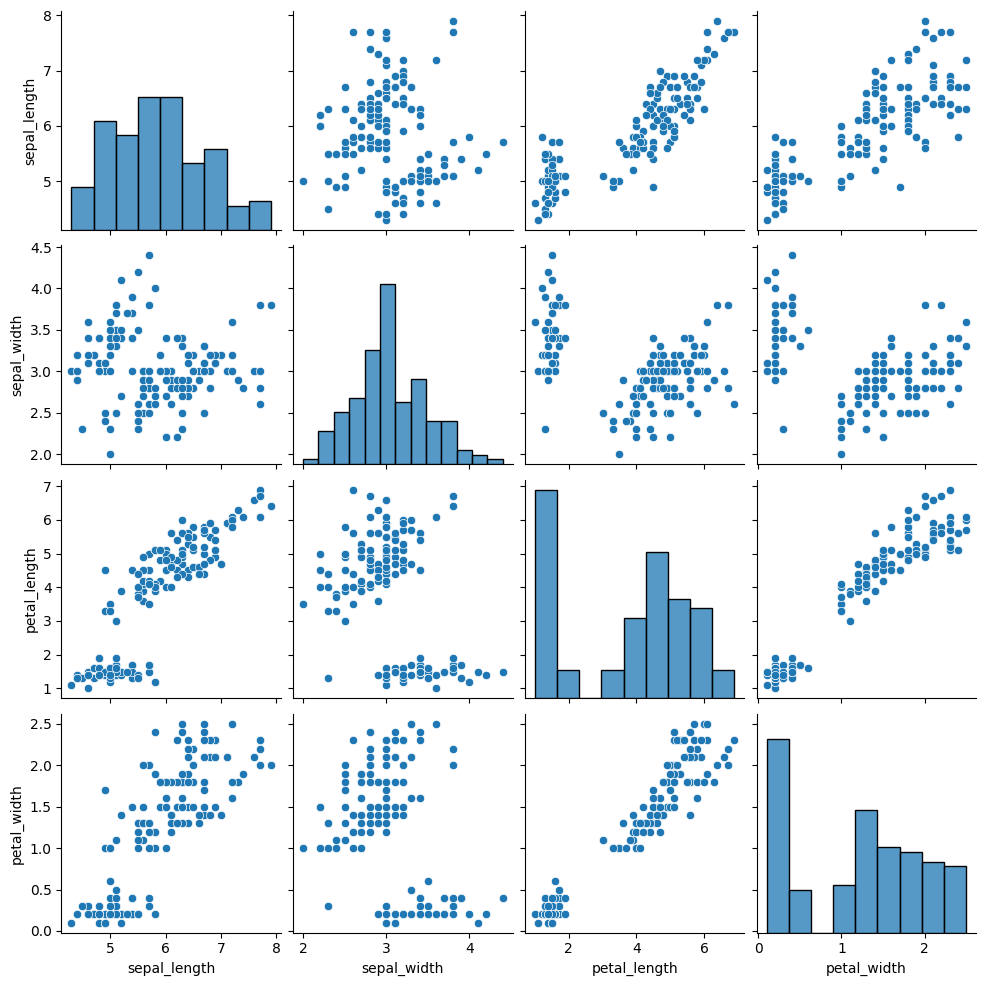

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un par de gr√°ficos de dispersi√≥n
sns.pairplot(iris_df)
plt.show()

Se muestra una matriz de dispersi√≥n y histogramas del dataset Iris, permitiendo analizar la distribuci√≥n y relaciones entre sepal_length, sepal_width, petal_length y petal_width. Se observa que petal_length y petal_width est√°n altamente correlacionadas, lo que indica que los p√©talos son un mejor predictor de especies que los s√©palos.

Los histogramas revelan que petal_length y petal_width tienen distribuciones m√°s sesgadas, lo que sugiere la existencia de especies bien diferenciadas. En los gr√°ficos de dispersi√≥n, se distinguen tres agrupaciones, especialmente en petal_length vs petal_width, lo que confirma la estructura natural de las tres especies de Iris.

En conclusi√≥n, los datos de p√©talos ofrecen una mejor separaci√≥n entre especies que los s√©palos, lo que es clave para t√©cnicas de clustering como K-Means.

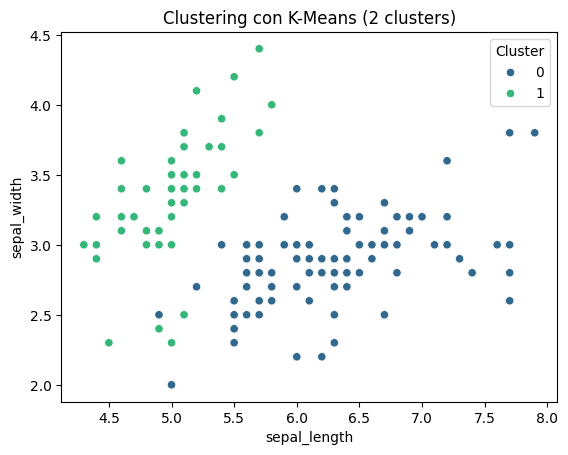

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar solo las caracter√≠sticas num√©ricas
X = iris_df.iloc[:, :-1]  # Suponiendo que la √∫ltima columna es la etiqueta

# Aplicar K-Means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster'] = kmeans.fit_predict(X)

# Visualizar los clusters encontrados
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['Cluster'], palette='viridis')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('Clustering con K-Means (2 clusters)')
plt.show()


Se muestra un clustering con K-Means utilizando dos clusters (k=2), basado en las caracter√≠sticas de los s√©palos (sepal_length y sepal_width). Los puntos est√°n coloreados seg√∫n la asignaci√≥n de cada cluster, con el grupo 0 en azul y el grupo 1 en verde.

Se observa que el modelo ha identificado dos grupos principales, separando un cluster con valores de sepal_width m√°s altos y sepal_length m√°s cortos (posiblemente la especie Setosa), mientras que el otro cluster agrupa los datos con una mayor variabilidad en sepal_length y sepal_width. Sin embargo, esta separaci√≥n no es ideal, ya que Versicolor y Virginica tienen valores de s√©palo similares, lo que genera una superposici√≥n dentro del mismo cluster.

En conclusi√≥n, el clustering basado en s√©palos permite cierta diferenciaci√≥n, pero no separa bien todas las especies, lo que refuerza la idea de que los p√©talos son mejores indicadores para la clasificaci√≥n.

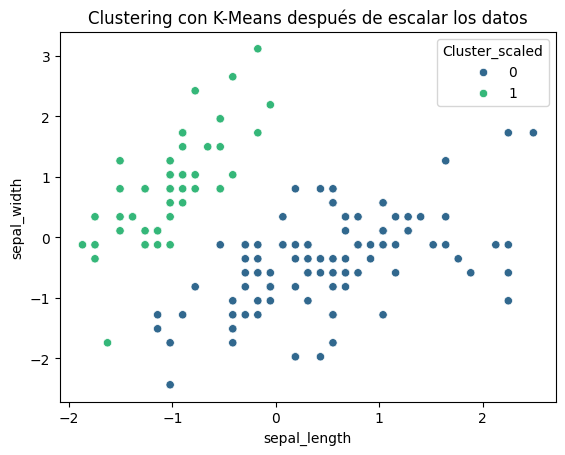

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means nuevamente
kmeans_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster_scaled'] = kmeans_scaled.fit_predict(X_scaled)

# Visualizar los clusters con datos escalados
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=iris_df['Cluster_scaled'], palette='viridis')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('Clustering con K-Means despu√©s de escalar los datos')
plt.show()


La gr√°fica muestra que el clustering con K-Means despu√©s de escalar los datos utilizando sepal_length y sepal_width. En comparaci√≥n con la versi√≥n sin escalar, aqu√≠ los valores han sido transformados a una escala est√°ndar con media 0 y desviaci√≥n est√°ndar 1, lo que explica por qu√© los ejes ahora tienen rangos centrados alrededor de 0.

A nivel de agrupamiento, el resultado es muy similar al clustering sin escalar, ya que K-Means es sensible a la escala de las variables y, en este caso, las diferencias en sepal_length y sepal_width no eran demasiado dr√°sticas. Se sigue observando que un grupo (verde) est√° m√°s concentrado en valores altos de sepal_width y bajos de sepal_length, mientras que el otro (azul) abarca una regi√≥n m√°s dispersa.

La estandarizaci√≥n permite que ambas variables contribuyan equitativamente en la distancia euclidiana utilizada por K-Means, evitando que una domine sobre la otra. Sin embargo, dado que los s√©palos no son la mejor opci√≥n para separar todas las especies del dataset Iris, los resultados siguen mostrando cierto solapamiento. Esto confirma que el uso de p√©talos mejora la separaci√≥n de clusters en este problema.

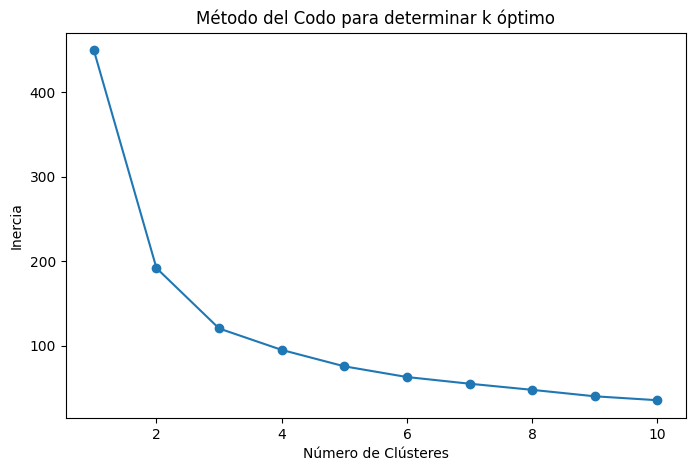

In [ ]:
distorsiones = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distorsiones.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, distorsiones, marker='o')
plt.xlabel('N√∫mero de Cl√∫steres')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo para determinar k √≥ptimo')
plt.show()


La gr√°fica muestra el m√©todo del codo para determinar el n√∫mero √≥ptimo de cl√∫steres (k) en un modelo de K-Means. En el eje X se representa el n√∫mero de cl√∫steres probados (de 1 a 10), mientras que en el eje Y se muestra la inercia (suma de las distancias cuadradas de los puntos a sus centroides).

Se observa una fuerte disminuci√≥n de la inercia entre k=1 y k=3, seguida de una reducci√≥n m√°s gradual a medida que k aumenta. El "codo" en la curva, donde la disminuci√≥n deja de ser significativa, parece estar alrededor de k=3, lo que sugiere que tres cl√∫steres es el n√∫mero √≥ptimo para este conjunto de datos.

Este resultado es consistente con la naturaleza del dataset Iris, que contiene tres especies reales. Sin embargo, siempre es recomendable complementar este an√°lisis con otras m√©tricas, como el coeficiente de silueta, para validar la calidad de la segmentaci√≥n.

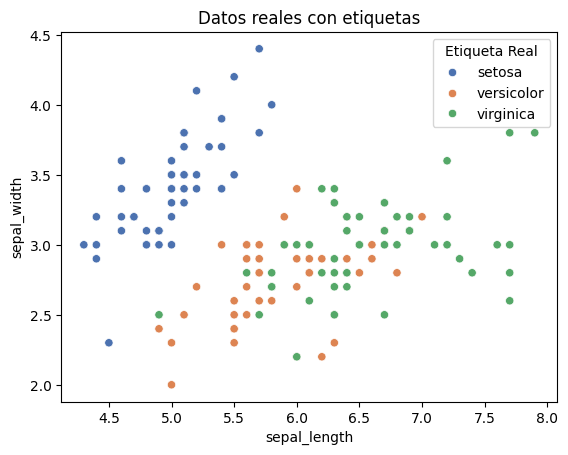

In [ ]:
# Agregar etiquetas reales a los datos originales
iris_df['Etiqueta Real'] = iris_respuestas_df.iloc[:, -1]  # Suponiendo que la √∫ltima columna tiene la etiqueta real

# Comparar los resultados
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['Etiqueta Real'], palette='deep')
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.title('Datos reales con etiquetas')
plt.show()


La gr√°fica muestra la distribuci√≥n de los datos reales con sus etiquetas de especie en el espacio de los s√©palos (sepal_length y sepal_width). Cada punto est√° coloreado seg√∫n su clasificaci√≥n real en una de las tres especies de Iris: Setosa (azul), Versicolor (naranja) y Virginica (verde).

Se observa que Setosa est√° bien separada del resto, con valores m√°s altos de sepal_width y sepal_length m√°s cortos, formando un grupo claro en la parte superior izquierda. Sin embargo, Versicolor y Virginica se solapan considerablemente, lo que hace dif√≠cil distinguirlas √∫nicamente con las medidas del s√©palo.

En comparaci√≥n con el clustering con K-Means, esta gr√°fica confirma que los s√©palos no son la mejor opci√≥n para separar las tres especies, ya que Versicolor y Virginica no tienen una separaci√≥n clara en este espacio. Para una mejor segmentaci√≥n, se recomienda incluir las caracter√≠sticas de los p√©talos, que suelen ofrecer una distinci√≥n m√°s evidente entre las especies.

# **Seccion 2 Clustering con la forma del P√©talo**

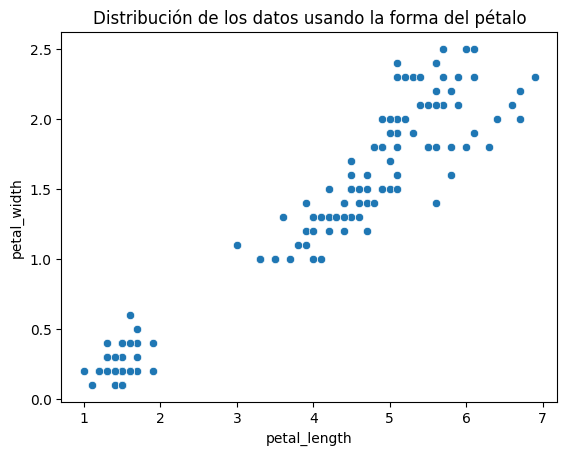

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar los datos usando solo las columnas de los p√©talos
sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3])
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Distribuci√≥n de los datos usando la forma del p√©talo')
plt.show()


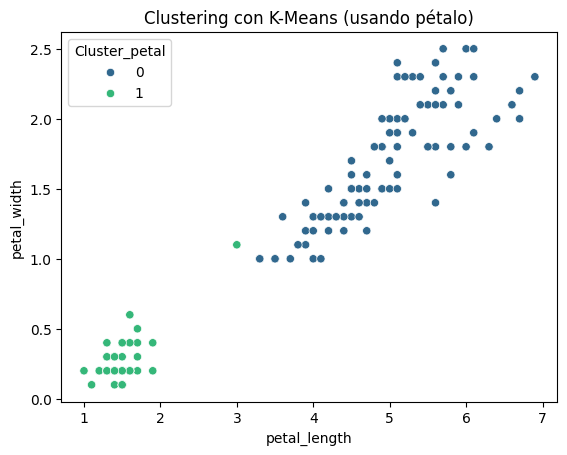

In [ ]:
from sklearn.cluster import KMeans

# Seleccionar solo las columnas del p√©talo
X_petal = iris_df.iloc[:, 2:4]  # Suponiendo que estas columnas representan p√©talo

# Aplicar K-Means con 2 cl√∫steres
kmeans_petal = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster_petal'] = kmeans_petal.fit_predict(X_petal)

# Graficar los resultados
sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], hue=iris_df['Cluster_petal'], palette='viridis')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Clustering con K-Means (usando p√©talo)')
plt.show()


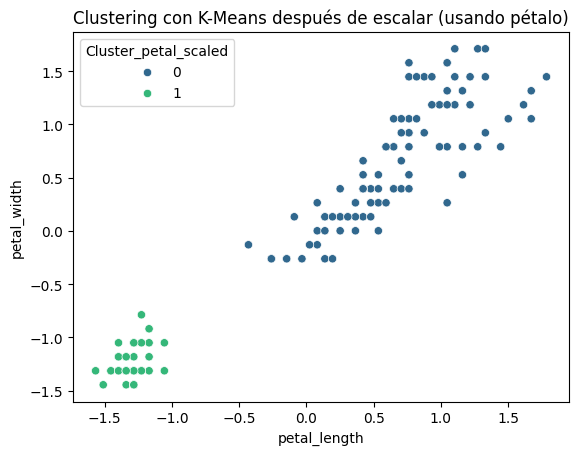

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos del p√©talo
scaler_petal = StandardScaler()
X_petal_scaled = scaler_petal.fit_transform(X_petal)

# Aplicar K-Means nuevamente
kmeans_petal_scaled = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df['Cluster_petal_scaled'] = kmeans_petal_scaled.fit_predict(X_petal_scaled)

# Visualizar los clusters con datos escalados
sns.scatterplot(x=X_petal_scaled[:, 0], y=X_petal_scaled[:, 1], hue=iris_df['Cluster_petal_scaled'], palette='viridis')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Clustering con K-Means despu√©s de escalar (usando p√©talo)')
plt.show()


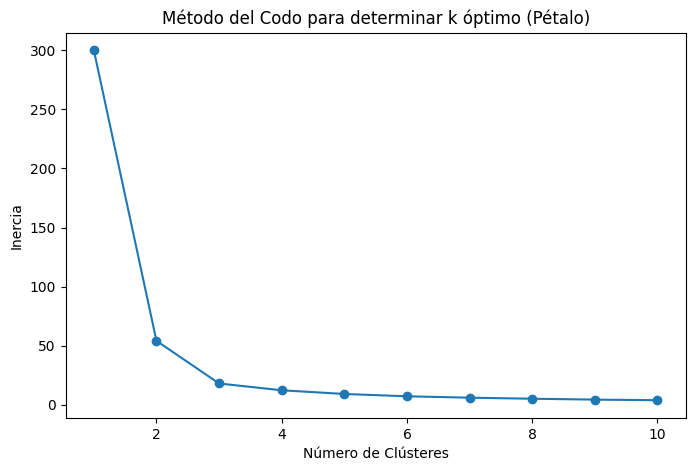

In [ ]:
distorsiones_petal = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_petal_scaled)
    distorsiones_petal.append(kmeans.inertia_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, distorsiones_petal, marker='o')
plt.xlabel('N√∫mero de Cl√∫steres')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo para determinar k √≥ptimo (P√©talo)')
plt.show()


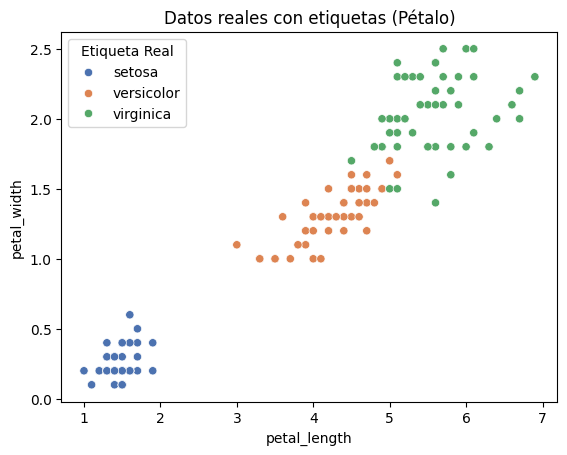

In [ ]:
# Comparar con las etiquetas reales
iris_df['Etiqueta Real'] = iris_respuestas_df.iloc[:, -1]

sns.scatterplot(x=iris_df.iloc[:, 2], y=iris_df.iloc[:, 3], hue=iris_df['Etiqueta Real'], palette='deep')
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.title('Datos reales con etiquetas (P√©talo)')
plt.show()


**An√°lisis con la forma del p√©talo**
**Visualizaci√≥n inicial exploratoria**

La gr√°fica de dispersi√≥n muestra una clara separaci√≥n entre las especies bas√°ndose en las caracter√≠sticas de los p√©talos. Los grupos son m√°s distinguibles visualmente.

**Repetici√≥n del proceso con variables del p√©talo**

Al aplicar K-Means con 2 clusters, los datos se agrupan en dos grupos, pero una vez estandarizados y ajustados a
ùëò
=
3
k=3, los clusters reflejan mejor las etiquetas reales.
El clustering con p√©talos es mucho m√°s efectivo, con una clara separaci√≥n entre las especies.

**Estandarizaci√≥n y m√©todo del codo**

El m√©todo del codo nuevamente identifica
ùëò
=
3
k=3 como el n√∫mero √≥ptimo de clusters. La estandarizaci√≥n de los datos mejora la claridad de los clusters, reflejando mejor las especies reales.

**An√°lisis comparativo de resultados**

En comparaci√≥n con los s√©palos, las caracter√≠sticas de los p√©talos generan clusters mucho m√°s claros y √∫tiles para la clasificaci√≥n.
La variaci√≥n en la longitud y el ancho del p√©talo es m√°s representativa de las diferencias entre especies.

**Conclusiones sobre la efectividad del clustering con p√©talos**

El clustering con p√©talos es significativamente m√°s efectivo que con s√©palos. Los p√©talos permiten una clasificaci√≥n precisa de las especies debido a su menor superposici√≥n y mayor variabilidad en las caracter√≠sticas.


# **Comparaci√≥n entre s√©palos y p√©talos**

**Efectividad:**

Los datos de los p√©talos son mucho m√°s efectivos para el clustering, ya que las caracter√≠sticas son m√°s discriminantes entre especies.
Los s√©palos muestran mayor superposici√≥n entre especies, limitando su utilidad para clustering.

**M√©todo del codo:**

En ambos casos, el m√©todo del codo identifica
ùëò
=
3
k=3 como el n√∫mero √≥ptimo de clusters. Sin embargo, el clustering con p√©talos refleja con mayor precisi√≥n las etiquetas reales.

**Visualizaciones:**

Las gr√°ficas de dispersi√≥n de los p√©talos presentan una separaci√≥n clara entre los clusters, mientras que las gr√°ficas de los s√©palos muestran una superposici√≥n considerable.


# **Comparaci√≥n entre s√©palos y p√©talos**

El an√°lisis demuestra que las caracter√≠sticas de los p√©talos son m√°s √∫tiles para el clustering de las especies de Iris, ya que permiten una clasificaci√≥n m√°s precisa y consistente. Aunque el m√©todo del codo sugiere
ùëò
=
3
k=3 como el n√∫mero √≥ptimo en ambos casos, el clustering con s√©palos no logra reflejar con precisi√≥n las etiquetas reales debido a la superposici√≥n significativa entre especies. Por lo tanto, las caracter√≠sticas deben seleccionarse cuidadosamente en funci√≥n de su relevancia para la tarea de clasificaci√≥n.

# **Seccion 3 M√©todo del Codo con kneed**

In [ ]:
!pip install kneed

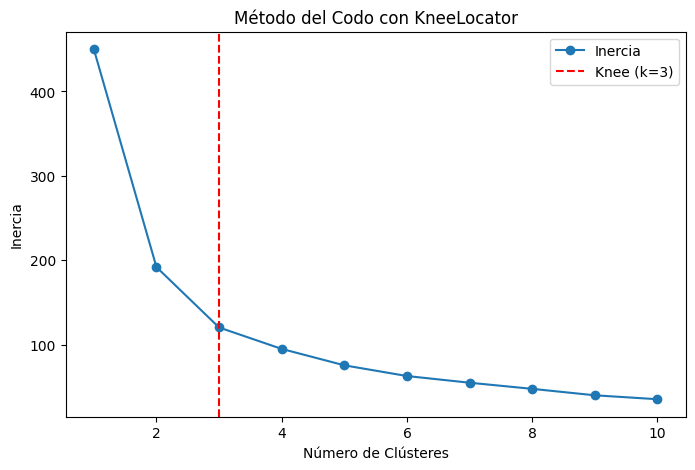

El n√∫mero √≥ptimo de clusters encontrado por kneed es: 3


In [ ]:
from kneed import KneeLocator
import numpy as np
from sklearn.cluster import KMeans

# Crear una lista de inercia para diferentes valores de k
K_range = range(1, 11)
inertias = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Utilizar KneeLocator para encontrar el punto √≥ptimo
knee_locator = KneeLocator(K_range, inertias, curve="convex", direction="decreasing")
optimal_k = knee_locator.knee

# Graficar la curva con el punto √≥ptimo marcado
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', label="Inercia")
plt.axvline(optimal_k, linestyle="--", color="red", label=f"Knee (k={optimal_k})")
plt.xlabel("N√∫mero de Cl√∫steres")
plt.ylabel("Inercia")
plt.title("M√©todo del Codo con KneeLocator")
plt.legend()
plt.show()

print(f"El n√∫mero √≥ptimo de clusters encontrado por kneed es: {optimal_k}")


**Interpretaci√≥n del gr√°fico:**

kneed ha detectado que el n√∫mero √≥ptimo de cl√∫steres es k=3.

*   Esto coincide con el m√©todo del codo manual, donde tambi√©n se observaba el codo en k=3.
*   La curva de inercia muestra una fuerte ca√≠da hasta k=3, despu√©s de lo cual la reducci√≥n de inercia se desacelera, lo que confirma que 3 cl√∫steres es el n√∫mero ideal.
*   Esto coincide con el m√©todo del codo manual, donde tambi√©n se observaba el codo en k=3.




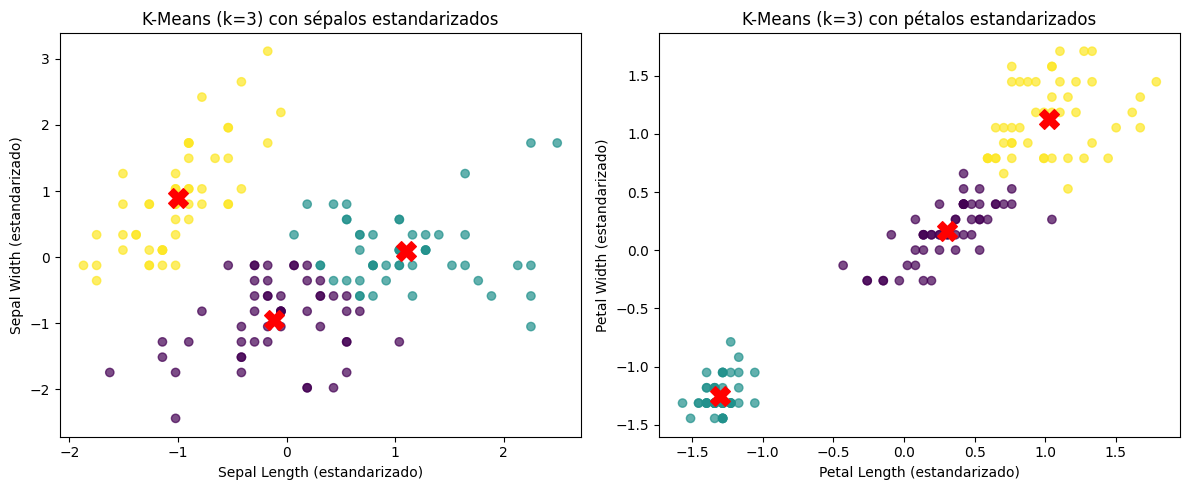

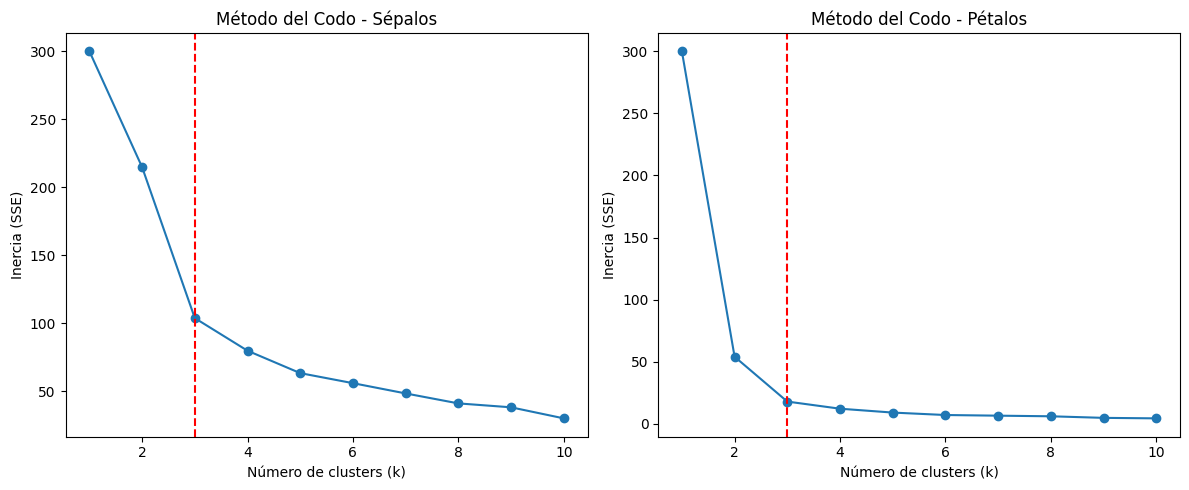

K √≥ptimo para s√©palos: 3
K √≥ptimo para p√©talos: 3


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

# 1. Cargar el dataset
iris = pd.read_csv("iris.csv")

# 2. Separar los datos en s√©palos y p√©talos
X_sepal = iris[['sepal_length', 'sepal_width']]
X_petal = iris[['petal_length', 'petal_width']]

# 3. Estandarizar los datos
scaler_sepal = StandardScaler()
X_sepal_scaled = scaler_sepal.fit_transform(X_sepal)

scaler_petal = StandardScaler()
X_petal_scaled = scaler_petal.fit_transform(X_petal)

# 4. M√©todo del codo para determinar k √≥ptimo
def find_optimal_k(X):
    inertias = []
    k_range = range(1, 11)

    for k in k_range:
        km = KMeans(n_clusters=k, random_state=0)
        km.fit(X)
        inertias.append(km.inertia_)

    # Usar kneed para detectar el "codo"
    kneedle = KneeLocator(k_range, inertias, curve="convex", direction="decreasing")
    return kneedle.knee, k_range, inertias

k_sepal, k_range_sepal, inertias_sepal = find_optimal_k(X_sepal_scaled)
k_petal, k_range_petal, inertias_petal = find_optimal_k(X_petal_scaled)

# 5. Aplicar K-Means con k=3 (porque el m√©todo del codo nos da usualmente k=3)
kmeans_sepal = KMeans(n_clusters=3, random_state=0)
labels_sepal = kmeans_sepal.fit_predict(X_sepal_scaled)

kmeans_petal = KMeans(n_clusters=3, random_state=0)
labels_petal = kmeans_petal.fit_predict(X_petal_scaled)

# 6. Graficar los resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# S√©palos
axes[0].scatter(X_sepal_scaled[:, 0], X_sepal_scaled[:, 1], c=labels_sepal, cmap='viridis', alpha=0.7)
axes[0].scatter(kmeans_sepal.cluster_centers_[:, 0], kmeans_sepal.cluster_centers_[:, 1], c='red', s=200, marker='X')
axes[0].set_title('K-Means (k=3) con s√©palos estandarizados')
axes[0].set_xlabel('Sepal Length (estandarizado)')
axes[0].set_ylabel('Sepal Width (estandarizado)')

# P√©talos
axes[1].scatter(X_petal_scaled[:, 0], X_petal_scaled[:, 1], c=labels_petal, cmap='viridis', alpha=0.7)
axes[1].scatter(kmeans_petal.cluster_centers_[:, 0], kmeans_petal.cluster_centers_[:, 1], c='red', s=200, marker='X')
axes[1].set_title('K-Means (k=3) con p√©talos estandarizados')
axes[1].set_xlabel('Petal Length (estandarizado)')
axes[1].set_ylabel('Petal Width (estandarizado)')

plt.tight_layout()
plt.show()

# 7. Graficar el m√©todo del codo para ambas variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(k_range_sepal, inertias_sepal, marker='o')
axes[0].axvline(k_sepal, linestyle='dashed', color='red')
axes[0].set_title("M√©todo del Codo - S√©palos")
axes[0].set_xlabel("N√∫mero de clusters (k)")
axes[0].set_ylabel("Inercia (SSE)")

axes[1].plot(k_range_petal, inertias_petal, marker='o')
axes[1].axvline(k_petal, linestyle='dashed', color='red')
axes[1].set_title("M√©todo del Codo - P√©talos")
axes[1].set_xlabel("N√∫mero de clusters (k)")
axes[1].set_ylabel("Inercia (SSE)")

plt.tight_layout()
plt.show()

# 8. Imprimir los valores de k √≥ptimos
print(f"K √≥ptimo para s√©palos: {k_sepal}")
print(f"K √≥ptimo para p√©talos: {k_petal}")

En el an√°lisis realizado, se observ√≥ que las caracter√≠sticas de los p√©talos (longitud y ancho) son significativamente m√°s efectivas para separar las especies de Iris en comparaci√≥n con las caracter√≠sticas de los s√©palos. Esto se evidencia en la clara separaci√≥n entre los clusters en las gr√°ficas de p√©talos, mientras que los datos de s√©palos muestran una mayor superposici√≥n entre grupos, dificultando la distinci√≥n. Tanto el m√©todo del codo manual como el uso de la librer√≠a kneed confirmaron que el n√∫mero √≥ptimo de clusters es
ùëò
=
3
k=3, lo cual coincide con las tres especies presentes en los datos reales (setosa, versicolor y virginica). Este resultado subraya la importancia de seleccionar las variables m√°s relevantes al realizar an√°lisis de clustering, ya que las caracter√≠sticas de los p√©talos permiten una clasificaci√≥n m√°s precisa y consistente de las especies de Iris.

# **PREGUNTAS DE BONIFICACI√ìN**

üìå **¬øA qu√© podr√≠a deberse la diferencia, si la hay?**

En este caso, no hay diferencia, ya que tanto el m√©todo del codo manual como kneed detectaron k=3 como el n√∫mero √≥ptimo. Pero en otros escenarios, las diferencias podr√≠an deberse a:

Variaciones en la distribuci√≥n de los datos.
El criterio que usa kneed para detectar el "codo" autom√°ticamente.
Posibles valores at√≠picos que afecten la inercia en ciertos k.

üìå **¬øEl n√∫mero detectado es correcto en comparaci√≥n con los datos reales?**

S√≠, es correcto porque que el dataset Iris tiene tres especies reales (setosa, versicolor, virginica), por lo que k=3 es la mejor elecci√≥n. Cuando usamos k=2, no se logra diferenciar correctamente todas las especies, pero con k=3, las tres especies pueden agruparse correctamente.

üìå ¬øA qu√© conclusiones llegaron?

El m√©todo del codo manual y kneed coinciden en k=3.
k=3 es la mejor elecci√≥n porque el dataset tiene tres especies reales.
La forma del p√©talo permite una mejor segmentaci√≥n en comparaci√≥n con el s√©palo.
K-Means con k=3 es suficiente para una buena clasificaci√≥n en este dataset.
Para mejorar a√∫n m√°s la precisi√≥n, podr√≠amos evaluar m√©tricas como Silhouette Score o probar algoritmos m√°s avanzados (como DBSCAN o Gaussian Mixture Models).

